In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename1 = 'drive/MyDrive/TextAnalytics/training_set_1.csv'
filename2 = 'drive/MyDrive/TextAnalytics/training_set_2.csv'
filename3 = 'drive/MyDrive/TextAnalytics/test_set.csv'
filename4 = 'drive/MyDrive/TextAnalytics/remaining_set.csv'

Mounted at /content/drive


In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# Usiamo tutti i dati a disposizione

df_train1 = pd.read_csv(filename1)
df_train2 = pd.read_csv(filename2)
df_test = pd.read_csv(filename3)
df_remaining = pd.read_csv(filename4)

frames = [df_train1, df_train2, df_test, df_remaining]
df = pd.concat(frames)

len(df)

53337

In [ ]:
df.tail(2)

,Unnamed: 0,review_rating,date,year,review_title,body,product_title,product_rating,language,english,pos_review,body_tok,body_tok_ngrams,body_lem_ngrams
13335,7,3,"February 10, 2009",2009,does the job,I got this phone just as secondary cell phone....,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,en,1,0,"['got', 'phone', 'secondary', 'cell', 'phone',...","['got', 'phone', 'secondary', 'cell', 'phone',...","['LEM_get', 'LEM_phone', 'LEM_secondary', 'LEM..."
13336,36,1,"September 23, 2009",2009,Worst Experience with Amazon,This is probably the wrost experience i had wi...,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",3.0,en,1,0,"['probably', 'wrost', 'experience', 'amazon', ...","['probably', 'wrost', 'experience', 'amazon', ...","['LEM_probably', 'LEM_wrost', 'LEM_experience'..."


## Preparazione del dataset

In [ ]:
x = df['body_tok']

In [ ]:
vectorizer = CountVectorizer(min_df = 5, ngram_range = (1,3)) # scelta n degli n-grams

In [ ]:
vectorizer.fit(x)
features = vectorizer.transform(x)

## K_means

In [ ]:
sse = []
silhouette_avg = []
silhouette_values = {}

for k in range(2, 8):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(features)

  sse.append(model.inertia_)
  silhouette_avg.append(silhouette_score(features, model.labels_))
  silhouette_values[k] =silhouette_samples(features, model.labels_)

  print('K          = ', k)
  print('SSE        = ', model.inertia_)
  print('silhouette = ', silhouette_avg[-1], end='\n\n')

K          =  2
SSE        =  3246454.5544623565
silhouette =  0.5110369209598361

K          =  3
SSE        =  3180353.283761007
silhouette =  0.32618474828337707

K          =  4
SSE        =  3150469.7355702193
silhouette =  0.18290239414486223

K          =  5
SSE        =  3132867.0220593447
silhouette =  0.16877655166692837

K          =  6
SSE        =  3120111.4373398544
silhouette =  0.17542042512821185

K          =  7
SSE        =  3110286.1125438055
silhouette =  0.15686694764624728



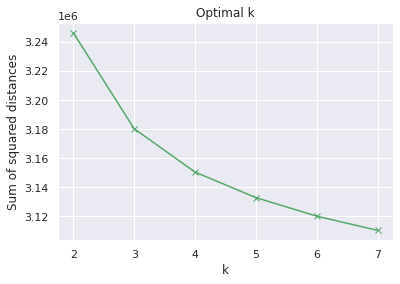

In [ ]:
# Plot K-Means alternativo

sns.set(style='darkgrid')
plt.plot(range(2, 8), sse, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k')
plt.show()

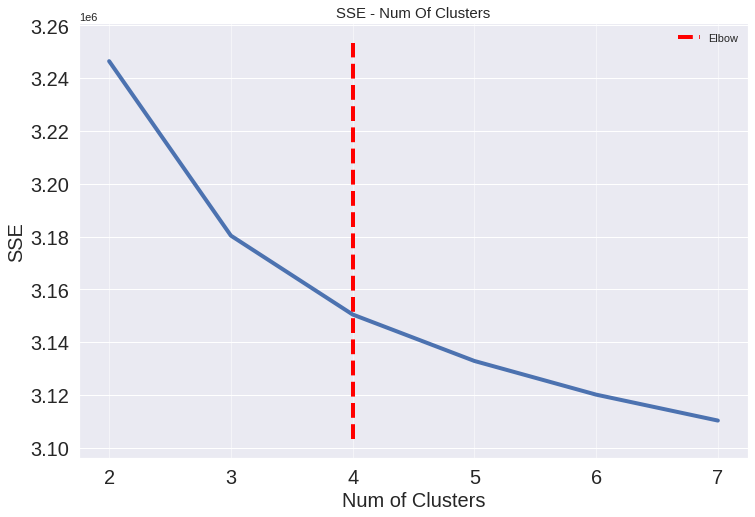

In [ ]:
from kneed import KneeLocator

n=20

# SSE plot 
kl = KneeLocator(range(2,8), sse, curve="convex", direction="decreasing")
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('seaborn-darkgrid')
plt.plot(range(2,8), sse, linewidth = 4)
plt.xlabel('Num of Clusters', fontsize=n)
plt.ylabel('SSE', fontsize=n)
plt.xticks(fontsize=n)
plt.yticks(fontsize=n)
plt.title('SSE - Num Of Clusters', fontsize=15)
plt.grid(which='both', axis='x',alpha=0.5)
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',color='red',label= "Elbow", linewidth = 4)
plt.legend(shadow=True)
plt.show()

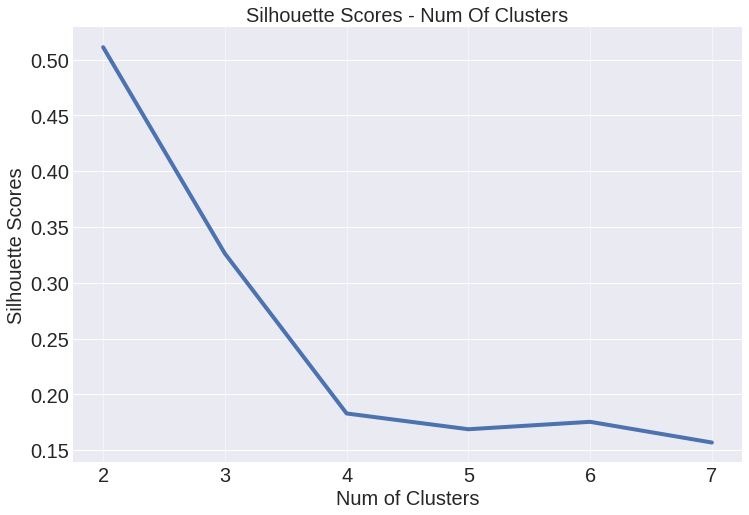

In [ ]:
# Silhouette plot
fig, ax = plt.subplots(1,1, figsize =(12, 8))
plt.style.use('seaborn-darkgrid')
ax.plot(range(2,8),silhouette_avg, linewidth = 4)
ax.set_xlabel('Num of Clusters', fontsize=n)
ax.set_ylabel('Silhouette Scores', fontsize=n)
plt.xticks(fontsize=n)
plt.yticks(fontsize=n)
plt.title('Silhouette Scores - Num Of Clusters', fontsize=n)
plt.grid(which='both', axis='x',alpha=0.5)
plt.show()

In [ ]:
silhouette_avg

[0.5110369209598361,
 0.32618474828337707,
 0.18290239414486223,
 0.16877655166692837,
 0.17542042512821185,
 0.15686694764624728]

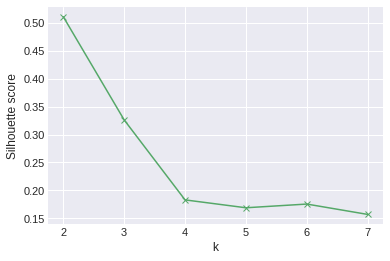

In [ ]:
# Plot silohouette alternativo

plt.plot(range(2, 8), silhouette_avg, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('')
plt.show()

In [ ]:
# K-Means con K=4

model = KMeans(n_clusters=4, random_state=42)
model.fit(features)

df['cluster'] = model.labels_

df['cluster']

0        1
1        1
2        1
3        0
4        2
        ..
13332    0
13333    2
13334    0
13335    1
13336    1
Name: cluster, Length: 53337, dtype: int32

In [ ]:
# Numero di elementi per cluster

num_clusters = df['cluster'].value_counts()
print(num_clusters)

0    37008
1    13610
2     2462
3      257
Name: cluster, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cardinalità dei cluster')

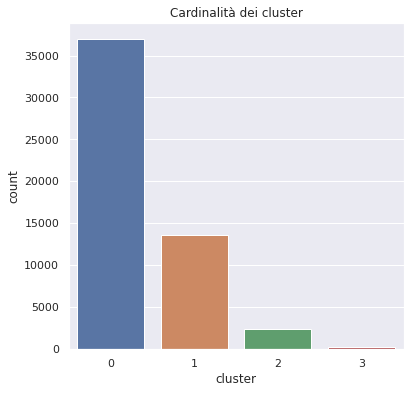

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style=('darkgrid'))
g = sns.countplot(df['cluster'])
g.set(xticks=[0,1,2,3]) # per togliere floats dalle x
plt.title('Cardinalità dei cluster')

## Creazione 4 dataframe, 1 per cluster

In [ ]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]

list_of_clusters = [df0,df1,df2,df3] # per iterare

In [ ]:
df0['pos_review'].value_counts()

1    26446
0    10562
Name: pos_review, dtype: int64

In [ ]:
counts0 = list(df0['pos_review'].value_counts())[::-1]
counts1 = list(df1['pos_review'].value_counts())[::-1]
counts2 = list(df2['pos_review'].value_counts())[::-1]
counts3 = list(df3['pos_review'].value_counts())[::-1]
sum(counts0)

37008

In [ ]:
# Distribuzione variabile target nei cluster

print('Cluster 0')
#print(df0['pos_review'].value_counts())
print("0: {} ({})\n1: {} ({})".format(counts0[0], round(counts0[0]/sum(counts0),2) , counts0[1], round(counts0[1]/sum(counts0), 2)))
print()

print('Cluster 1')
#print(df1['pos_review'].value_counts())
print("0: {} ({})\n1: {} ({})".format(counts1[0], round(counts1[0]/sum(counts1),2) , counts1[1], round(counts1[1]/sum(counts1), 2)))

print()

print('Cluster 2')
#print(df2['pos_review'].value_counts())
print("0: {} ({})\n1: {} ({})".format(counts2[0], round(counts2[0]/sum(counts2),2) , counts2[1], round(counts2[1]/sum(counts2), 2)))

print()

print('Cluster 3')
#print(df3['pos_review'].value_counts())
print("0: {} ({})\n1: {} ({})".format(counts3[0], round(counts3[0]/sum(counts3),2) , counts3[1], round(counts3[1]/sum(counts3), 2)))
print()

Cluster 0
0: 10562 (0.29)
1: 26446 (0.71)

Cluster 1
0: 5504 (0.4)
1: 8106 (0.6)

Cluster 2
0: 978 (0.4)
1: 1484 (0.6)

Cluster 3
0: 72 (0.28)
1: 185 (0.72)



In [ ]:
# Distribuzione year

print('Cluster 0')
print(df0['year'].value_counts().sort_values())
print()

print('Cluster 1')
print(df1['year'].value_counts().sort_values())
print()

print('Cluster 2')
print(df2['year'].value_counts().sort_values())
print()

print('Cluster 3')
print(df3['year'].value_counts().sort_values())
print()

Cluster 0
2010        2
2009        3
2011       24
2012      119
2013      811
2014     1588
2015     2637
2016     3196
2017     4650
2018     7647
2019    16331
Name: year, dtype: int64

Cluster 1
2009       2
2010       7
2011      15
2012     133
2013     622
2015     705
2014     742
2016     967
2017    1648
2018    2958
2019    5811
Name: year, dtype: int64

Cluster 2
2009       1
2010       3
2011      10
2012      36
2015     132
2014     132
2013     144
2016     151
2017     310
2018     529
2019    1014
Name: year, dtype: int64

Cluster 3
2012     1
2011     1
2015    16
2013    17
2016    22
2014    23
2017    42
2018    53
2019    82
Name: year, dtype: int64



In [ ]:
from collections import Counter

# Parole più frequenti cluster 0
p = Counter(" ".join(df0['body_tok']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print('Cluster 0')
print(rslt)
print()

# Parole più frequenti cluster 1
p = Counter(" ".join(df1['body_tok']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print('Cluster 1')
print(rslt)
print()

# Parole più frequenti cluster 2
p = Counter(" ".join(df2['body_tok']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print('Cluster 2')
print(rslt)
print()

# Parole più frequenti cluster 3
p = Counter(" ".join(df3['body_tok']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print('Cluster 3')
print(rslt)
print()

Cluster 0
         Word  Frequency
0    'phone',      15200
1    'great',       5888
2     'good',       4710
3  'battery',       4125
4      'new',       3790
5   'screen',       3406
6   ['phone',       3339
7    'works',       3268
8      'one',       3171
9   ['great',       3147

Cluster 1
         Word  Frequency
0    'phone',      32490
1    'great',       4791
2  'battery',       4052
3      'one',       3701
4   'screen',       3596
5      'new',       3518
6     'good',       3477
7    'would',       3339
8     'like',       3219
9      'use',       3093

Cluster 2
         Word  Frequency
0    'phone',      16074
1   'screen',       2410
2  'battery',       2248
3      'one',       2204
4     'like',       2125
5      'use',       2020
6      'get',       1958
7    'would',       1931
8     'good',       1809
9    'great',       1727

Cluster 3
         Word  Frequency
0    'phone',       4270
1   'screen',        770
2      'one',        717
3     'like',        716
4      

Prevedibilmente le parole più frequenti per ogni cluster sono simili.